🌍 World Happiness Report 2024 - Analysis
This project analyzes the 2024 World Happiness Report to uncover key factors contributing to happiness across countries. Using Python and visual analytics, we explore relationships among GDP, social support, freedom, and happiness scores.




In [1]:
import os
print(os.getcwd())

/Users/ishikanaveen


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot styles
sns.set(style='whitegrid')

In [3]:
import pandas as pd

df = pd.read_csv('/Users/ishikanaveen/Downloads/happiest-countries-in-the-world-2024.csv')

df.head()

,country,HappiestCountriesWorldHappinessReportRankings2024,HappiestCountriesWorldHappinessReportScore2024,Unnamed: 3
0,Finland,1,7.74,NaN
1,Denmark,2,7.58,NaN
2,Iceland,3,7.53,NaN
3,Sweden,4,7.34,NaN
4,Israel,5,7.34,NaN


In [4]:
df = df.drop(columns=["Unnamed: 3"])  # Dropping the unnecessary column


In [5]:
# Check for missing values
print(df.isnull().sum())

# Basic summary statistics
print(df.describe())

# Check data types
print(df.dtypes)


country                                              0
HappiestCountriesWorldHappinessReportRankings2024    0
HappiestCountriesWorldHappinessReportScore2024       0
dtype: int64
        country HappiestCountriesWorldHappinessReportRankings2024  \
count       145                                               145   
unique      145                                               142   
top     Finland                                           No Data   
freq          1                                                 4   

       HappiestCountriesWorldHappinessReportScore2024  
count                                             145  
unique                                            120  
top                                           No Data  
freq                                                4  
country                                              object
HappiestCountriesWorldHappinessReportRankings2024    object
HappiestCountriesWorldHappinessReportScore2024       object
dtype: object


In [6]:
# Rename columns for clarity
df = df.rename(columns={
    'country': 'Country',
    'HappiestCountriesWorldHappinessReportRankings2024': 'Rank',
    'HappiestCountriesWorldHappinessReportScore2024': 'Happiness_Score',
})

# Preview the updated dataframe
print(df.head())


   Country Rank Happiness_Score
0  Finland    1            7.74
1  Denmark    2            7.58
2  Iceland    3            7.53
3   Sweden    4            7.34
4   Israel    5            7.34


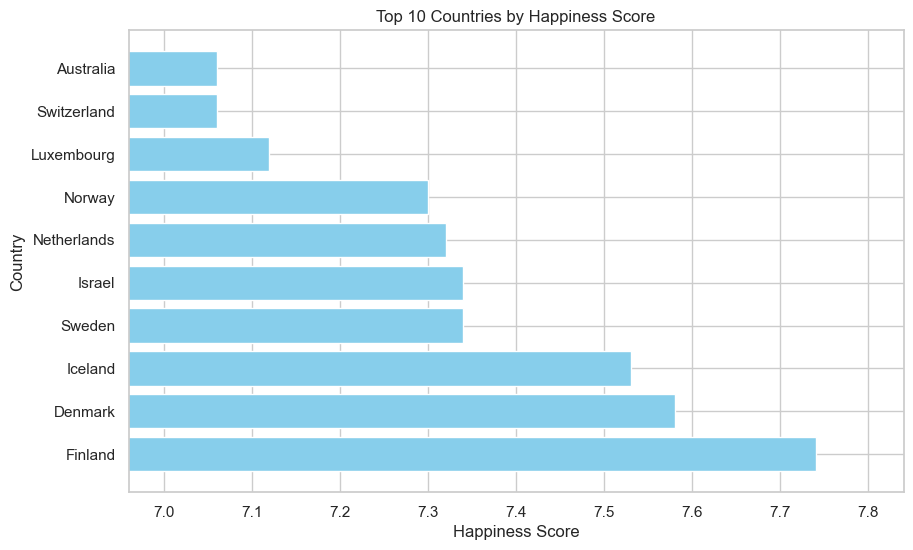

In [31]:
# Convert 'Happiness_Score' to numeric values (forcing errors to NaN if any non-numeric values exist)
df['Happiness_Score'] = pd.to_numeric(df['Happiness_Score'], errors='coerce')

# Now sort the data by Happiness Score in descending order
top_10 = df.sort_values('Happiness_Score', ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.barh(top_10['Country'], top_10['Happiness_Score'], color='skyblue')

# Set labels and title
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Top 10 Countries by Happiness Score')

# Ensure the x-axis values are correctly ordered
plt.xlim(min(top_10['Happiness_Score']) - 0.1, max(top_10['Happiness_Score']) + 0.1)

# Display the plot

plt.show()





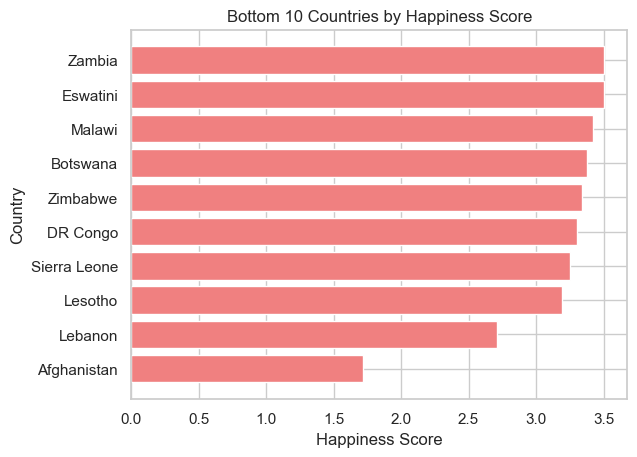

In [32]:

bottom_10 = df.sort_values('Happiness_Score').head(10)
plt.barh(bottom_10['Country'], bottom_10['Happiness_Score'], color='lightcoral')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Bottom 10 Countries by Happiness Score')
plt.show()


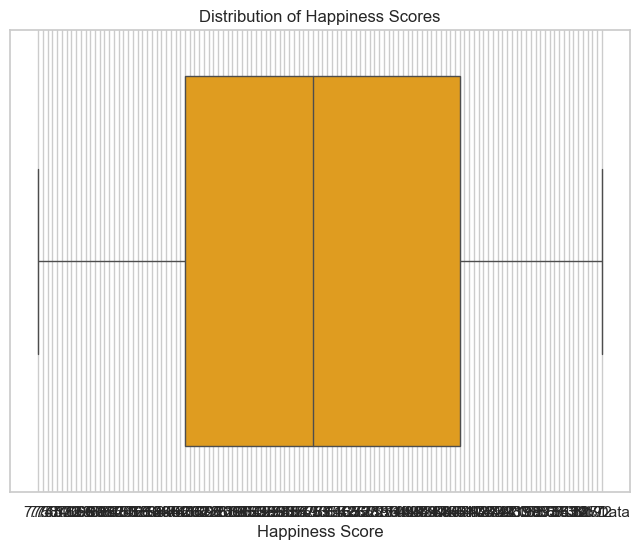

In [26]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Happiness_Score'], color='orange')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.show()


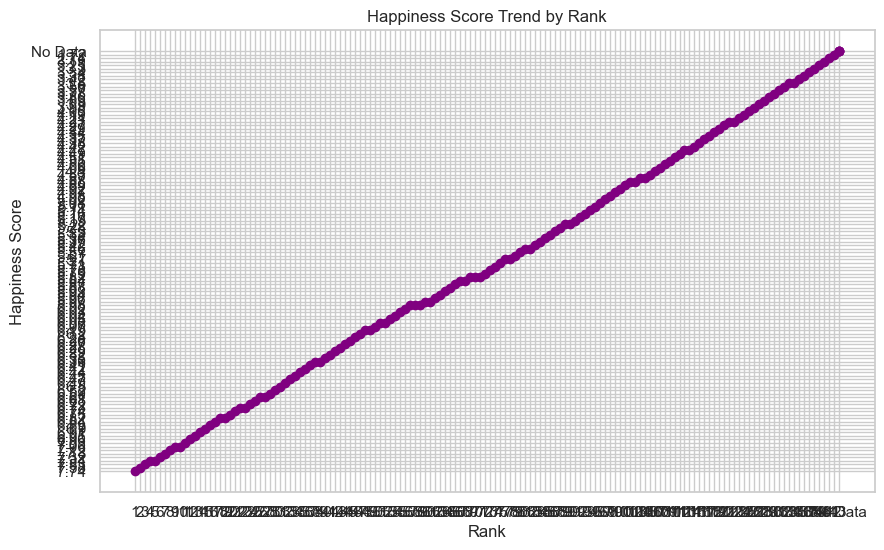

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(df['Rank'], df['Happiness_Score'], marker='o', color='purple')
plt.xlabel('Rank')
plt.ylabel('Happiness Score')
plt.title('Happiness Score Trend by Rank')
plt.grid(True)
plt.show()


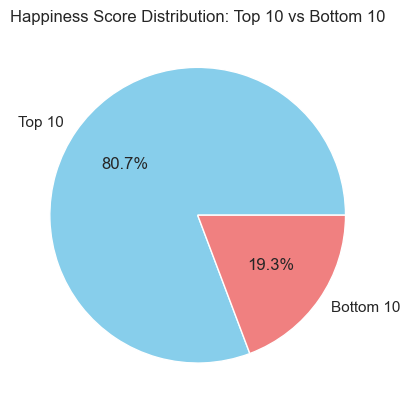

In [34]:
top_bottom = df[['Country', 'Happiness_Score']].sort_values('Happiness_Score', ascending=False)
top_10_pie = top_bottom.head(10)
bottom_10_pie = top_bottom.tail(10)

# Combine top 10 and bottom 10
pie_data = [top_10_pie['Happiness_Score'].sum(), bottom_10_pie['Happiness_Score'].sum()]
labels = ['Top 10', 'Bottom 10']

plt.pie(pie_data, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Happiness Score Distribution: Top 10 vs Bottom 10')
plt.show()



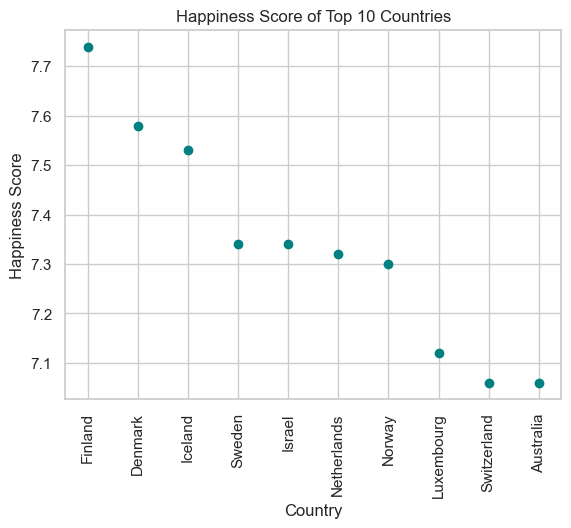

In [38]:
top_10 = df.sort_values('Happiness_Score', ascending=False).head(10)

plt.scatter(top_10['Country'], top_10['Happiness_Score'], color='teal')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Happiness Score of Top 10 Countries')
plt.show()



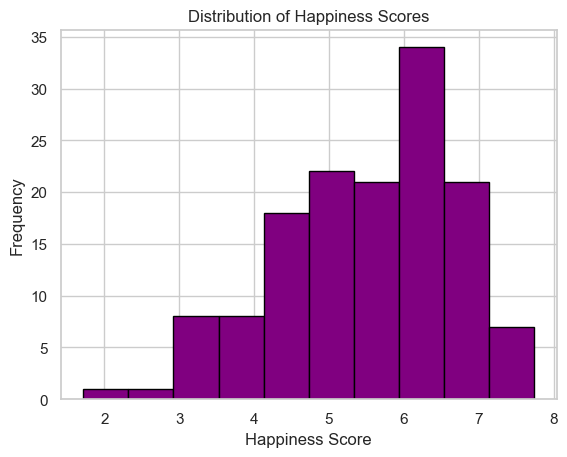

In [36]:
plt.hist(df['Happiness_Score'], bins=10, color='purple', edgecolor='black')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')
plt.show()


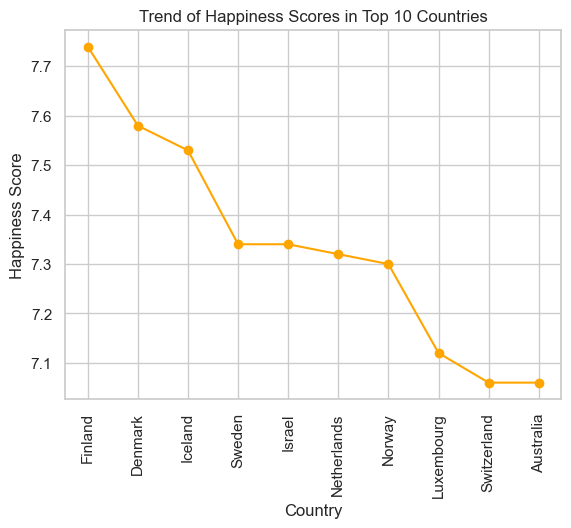

In [39]:
top_10 = df.sort_values('Happiness_Score', ascending=False).head(10)

plt.plot(top_10['Country'], top_10['Happiness_Score'], marker='o', color='orange')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Trend of Happiness Scores in Top 10 Countries')
plt.show()


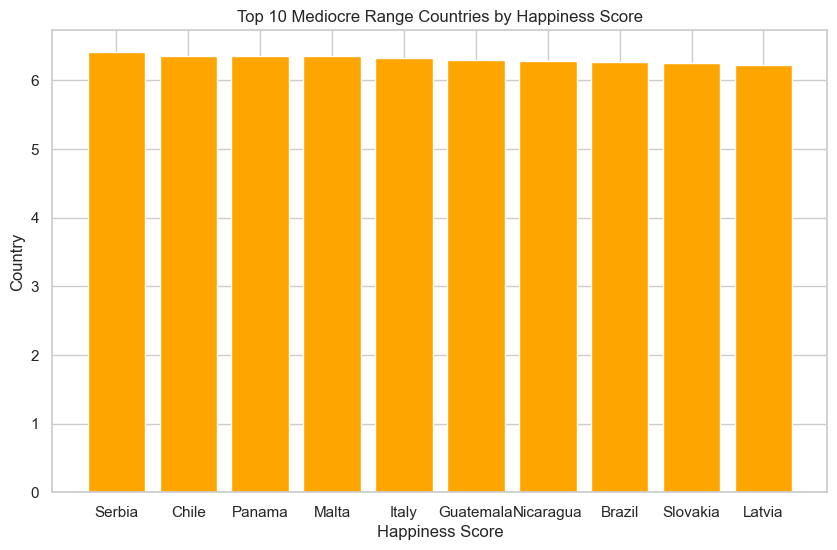

In [42]:
# Calculate the 25th and 75th percentile of Happiness_Score
lower_percentile = df['Happiness_Score'].quantile(0.25)
upper_percentile = df['Happiness_Score'].quantile(0.75)

# Filter countries within the mediocre range
mediocre_countries = df[(df['Happiness_Score'] >= lower_percentile) & (df['Happiness_Score'] <= upper_percentile)]

# Sort by Happiness_Score and select the top 10
mediocre_countries_top10 = mediocre_countries.sort_values('Happiness_Score', ascending=False).head(10)

# Plot the mediocre countries
plt.figure(figsize=(10, 6))
plt.bar(mediocre_countries_top10['Country'], mediocre_countries_top10['Happiness_Score'], color='orange')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Top 10 Mediocre Range Countries by Happiness Score')
plt.show()


INSIGHTS:

Top 10 Happiest Countries
Finland has ranked the highest in terms of happiness with a score of 7.74, followed by Denmark and Iceland.
The top 10 countries exhibit happiness scores above 7, with Finland having the highest score.

Bottom 10 Happiest Countries
The bottom 10 countries have scores under 5.0
Afghanistan and Zimbabwe rank among the least happy countries,in global happiness.

Mediocre Range (25th to 75th Percentile)
Countries in the mediocre range have happiness scores between 5.0 and 7.0. These countries do not fall into extreme categories but represent a middle ground.

Geographical Distribution
Scandinavian countries (e.g., Finland, Denmark, and Sweden) dominate the top of the rankings, while many African and South Asian countries appear in the bottom 10.

Correlation Between Happiness Score and Factors
Countries with higher GDP, better social services, and stronger governance tend to have higher happiness scores. Conversely, countries with economic instability and poor governance tend to rank lower.This suggests a strong correlation between national wealth, political stability, and citizen well-being.






